In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('../pp_1st')
sys.path.append('../pp_2nd')
import pp2nd_func
from sklearn.metrics import f1_score

In [2]:
train = pd.read_csv('../raw/PJT002_train.csv', )
val = pd.read_csv('../raw/PJT002_validation.csv' )
test = pd.read_csv('../raw/PJT002_test.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (8,172,173,174,175,176,177,178,179) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [63]:
binary_y = {'N': 0, 'Y': 1}
train['fr_yn'] = train['fr_yn'].map(binary_y)
val['fr_yn'] = val['fr_yn'].map(binary_y)

In [3]:
train.loc[train["bldng_us"].values == "제1종근린생활시설", "bldng_us"] = None
train.loc[train["bldng_us"].values == "제2종근린생활시설", "bldng_us"] = None

val.loc[val["bldng_us"].values == "제1종근린생활시설", "bldng_us"] = None
val.loc[val["bldng_us"].values == "제2종근린생활시설", "bldng_us"] = None

test.loc[test["bldng_us"].values == "제1종근린생활시설", "bldng_us"] = None
test.loc[test["bldng_us"].values == "제2종근린생활시설", "bldng_us"] = None

In [4]:
one_hot_bldng_us = pd.get_dummies(train["bldng_us"])
train = train.join(one_hot_bldng_us)

one_hot_bldng_us = pd.get_dummies(val["bldng_us"])
val = val.join(one_hot_bldng_us)

one_hot_bldng_us = pd.get_dummies(test["bldng_us"])
test = test.join(one_hot_bldng_us)

In [5]:
A = ["목구조", "일반목구조", "벽돌구조", "블록구조", "석구조", "조적구조"]
B = ["강파이프구조", "경량철골구조", "기타강구조", "기타구조", "기타조적구조"]
C = ["일반철골구조", "철골철근콘크리트구조", "철골콘크리트구조", "철근콘크리트구조"]

for i in A:
    train.loc[train["bldng_archtctr"].values == i, "bldng_archtctr_encoded"] = "A"

for i in B:
    train.loc[train["bldng_archtctr"].values == i, "bldng_archtctr_encoded"] = "B"
    
for i in C:
    train.loc[train["bldng_archtctr"].values == i, "bldng_archtctr_encoded"] = "C"

    
for i in A:
    val.loc[val["bldng_archtctr"].values == i, "bldng_archtctr_encoded"] = "A"

for i in B:
    val.loc[val["bldng_archtctr"].values == i, "bldng_archtctr_encoded"] = "B"
    
for i in C:
    val.loc[val["bldng_archtctr"].values == i, "bldng_archtctr_encoded"] = "C"


for i in A:
    test.loc[test["bldng_archtctr"].values == i, "bldng_archtctr_encoded"] = "A"

for i in B:
    test.loc[test["bldng_archtctr"].values == i, "bldng_archtctr_encoded"] = "B"
    
for i in C:
    test.loc[test["bldng_archtctr"].values == i, "bldng_archtctr_encoded"] = "C"

In [6]:
one_hot_bldng_archtctr = pd.get_dummies(train["bldng_archtctr_encoded"])
train = train.join(one_hot_bldng_archtctr)

one_hot_bldng_archtctr = pd.get_dummies(val["bldng_archtctr_encoded"])
val = val.join(one_hot_bldng_archtctr)

one_hot_bldng_archtctr = pd.get_dummies(test["bldng_archtctr_encoded"])
test = test.join(one_hot_bldng_archtctr)

In [7]:
train = train.drop("bldng_archtctr", 1)
val = val.drop("bldng_archtctr", 1)
test = test.drop("bldng_archtctr", 1)

train = train.drop("bldng_archtctr_encoded", 1)
val = val.drop("bldng_archtctr_encoded", 1)
test = test.drop("bldng_archtctr_encoded", 1)

In [8]:
train.loc[train["bldng_ar"]==0, "bldng_ar"] = train["bldng_ar"].median()
train.loc[train["ttl_ar"]==0, "ttl_ar"] = train["ttl_ar"].median()

val.loc[val["bldng_ar"]==0, "bldng_ar"] = val["bldng_ar"].median()
val.loc[val["ttl_ar"]==0, "ttl_ar"] = val["ttl_ar"].median()

test.loc[test["bldng_ar"]==0, "bldng_ar"] = test["bldng_ar"].median()
test.loc[test["ttl_ar"]==0, "ttl_ar"] = test["ttl_ar"].median()

In [9]:
train = train.drop("lnd_ar", 1)
val = val.drop("lnd_ar", 1)
test = test.drop("lnd_ar", 1)

In [44]:
train.loc[32635, 'dt_of_athrztn'] = 20020227 

In [46]:
train["dt_of_athrztn"] = train["dt_of_athrztn"].astype(str)
val["dt_of_athrztn"] = val["dt_of_athrztn"].astype(str)
test["dt_of_athrztn"]=test["dt_of_athrztn"].astype(str)

In [37]:
train["year_athrztn"] = train["dt_of_athrztn"].apply(lambda x : x[:4])
val["year_athrztn"] = val["dt_of_athrztn"].apply(lambda x : x[:4])
test["year_athrztn"]=test["dt_of_athrztn"].apply(lambda x : x[:4])

year_athrztn_notnull = train[(train["year_athrztn"]!="nan")]
year_athrztn_YYYY = year_athrztn_notnull[year_athrztn_notnull["year_athrztn"].astype(int)<3000]
year_athrztn_YY = year_athrztn_notnull[year_athrztn_notnull["year_athrztn"].astype(int)>3000]
year_athrztn_null = train[train["year_athrztn"]=="nan"]

year_athrztn_YY["year_athrztn"] = 1900 + year_athrztn_YY["dt_of_athrztn"].str[:2].astype(int)
year_athrztn_notnull = year_athrztn_YYYY.append(year_athrztn_YY)
year_athrztn_median=year_athrztn_notnull["year_athrztn"].median()
year_athrztn_null["year_athrztn"]=year_athrztn_median

train = year_athrztn_notnull.append(year_athrztn_null)
val.loc[val["year_athrztn"]=="nan","year_athrztn"]= val[val["year_athrztn"]!="nan"]["year_athrztn"].median()
test.loc[test["year_athrztn"]=="nan","year_athrztn"]= test[test["year_athrztn"]!="nan"]["year_athrztn"].median()

In [54]:
train["year_athrztn"] = train["year_athrztn"].astype(float).astype(int)
val["year_athrztn"] = val["year_athrztn"].astype(float).astype(int)
test["year_athrztn"]=test["year_athrztn"].astype(float).astype(int)

In [62]:
train.loc[train["year_athrztn"]<2000,"year_athrztn_encoded"] = "old"
train.loc[train["year_athrztn"]>1999,"year_athrztn_encoded"] = "new"

val.loc[val["year_athrztn"]<2000,"year_athrztn_encoded"] = "old"
val.loc[val["year_athrztn"]>1999,"year_athrztn_encoded"] = "new"

test.loc[test["year_athrztn"]<2000,"year_athrztn_encoded"] = "old"
test.loc[test["year_athrztn"]>1999,"year_athrztn_encoded"] = "new"

In [64]:
pd.pivot_table(train, index="year_athrztn_encoded", values="fr_yn")

,fr_yn
year_athrztn_encoded,
new,0.300941
old,0.093631


In [65]:
train = train.drop("dt_of_athrztn", 1)
val = val.drop("dt_of_athrztn", 1)
test = test.drop("dt_of_athrztn", 1)

In [66]:

train.loc[train["trgt_crtr"]=="자동화재탐지설치대상", "auto_fr"] = 1
train.loc[train["trgt_crtr"]!="자동화재탐지설치대상", "auto_fr"] = 0
train.loc[train["trgt_crtr"]=="옥내소화전설치대상", "fireplug"] = 1
train.loc[train["trgt_crtr"]!="옥내소화전설치대상", "fireplug"] = 0
train.loc[train["trgt_crtr"]=="스프링클러,물분무등설치대상", "sprinkler"] = 1
train.loc[train["trgt_crtr"]!="스프링클러,물분무등설치대상", "sprinkler"] = 0


val.loc[val["trgt_crtr"]=="자동화재탐지설치대상", "auto_fr"] = 1
val.loc[val["trgt_crtr"]!="자동화재탐지설치대상", "auto_fr"] = 0
val.loc[val["trgt_crtr"]=="옥내소화전설치대상", "fireplug"] = 1
val.loc[val["trgt_crtr"]!="옥내소화전설치대상", "fireplug"] = 0
val.loc[val["trgt_crtr"]=="스프링클러,물분무등설치대상", "sprinkler"] = 1
val.loc[val["trgt_crtr"]!="스프링클러,물분무등설치대상", "sprinkler"] = 0

test.loc[test["trgt_crtr"]=="자동화재탐지설치대상", "auto_fr"] = 1
test.loc[test["trgt_crtr"]!="자동화재탐지설치대상", "auto_fr"] = 0
test.loc[test["trgt_crtr"]=="옥내소화전설치대상", "fireplug"] = 1
test.loc[test["trgt_crtr"]!="옥내소화전설치대상", "fireplug"] = 0
test.loc[test["trgt_crtr"]=="스프링클러,물분무등설치대상", "sprinkler"] = 1
test.loc[test["trgt_crtr"]!="스프링클러,물분무등설치대상", "sprinkler"] = 0

In [67]:

train = train.drop("trgt_crtr", 1)
val = val.drop("trgt_crtr", 1)
test = test.drop("trgt_crtr", 1)

In [68]:
# train.loc[train["fr_fghtng_fclt_spcl_css_5_yn"].isnull(),"css_5_yn_encoded"]=0
# train.loc[train["fr_fghtng_fclt_spcl_css_5_yn"].notnull(),"css_5_yn_encoded"]=1

train.loc[train["fr_fghtng_fclt_spcl_css_6_yn"].isnull(),"css_6_yn_encoded"]=0
train.loc[train["fr_fghtng_fclt_spcl_css_6_yn"].notnull(),"css_6_yn_encoded"]=1

val.loc[train["fr_fghtng_fclt_spcl_css_6_yn"].isnull(),"css_6_yn_encoded"]=0
val.loc[train["fr_fghtng_fclt_spcl_css_6_yn"].notnull(),"css_6_yn_encoded"]=1

test.loc[train["fr_fghtng_fclt_spcl_css_6_yn"].isnull(),"css_6_yn_encoded"]=0
test.loc[train["fr_fghtng_fclt_spcl_css_6_yn"].notnull(),"css_6_yn_encoded"]=1

In [69]:
train = train.drop("fr_fghtng_fclt_spcl_css_5_yn", 1)
val = val.drop("fr_fghtng_fclt_spcl_css_5_yn", 1)
test = test.drop("fr_fghtng_fclt_spcl_css_5_yn", 1)

train = train.drop("fr_fghtng_fclt_spcl_css_6_yn", 1)
val = val.drop("fr_fghtng_fclt_spcl_css_6_yn", 1)
test = test.drop("fr_fghtng_fclt_spcl_css_6_yn", 1)

train = train.drop("css_5_yn_encoded", 1)

In [70]:
one_hot_us_yn = pd.get_dummies(train["us_yn"])
train = train.join(one_hot_us_yn)

one_hot_us_yn = pd.get_dummies(val["us_yn"])
val = val.join(one_hot_us_yn)

one_hot_us_yn = pd.get_dummies(test["us_yn"])
test = test.join(one_hot_us_yn)

train = train.drop("us_yn", 1)
val = val.drop("us_yn", 1)
test = test.drop("us_yn", 1)

In [71]:
train.loc[train["dngrs_thng_yn"].isnull(),"dngrs_thng_yn_encoded"]= 0
train.loc[train["dngrs_thng_yn"].notnull(),"dngrs_thng_yn_encoded"]= 1
val.loc[train["dngrs_thng_yn"].isnull(),"dngrs_thng_yn_encoded"]= 0
val.loc[train["dngrs_thng_yn"].notnull(),"dngrs_thng_yn_encoded"]= 1

test.loc[train["dngrs_thng_yn"].isnull(),"dngrs_thng_yn_encoded"]= 0
test.loc[train["dngrs_thng_yn"].notnull(),"dngrs_thng_yn_encoded"]= 1

train = train.drop("dngrs_thng_yn", 1)
val = val.drop("dngrs_thng_yn", 1)
test = test.drop("dngrs_thng_yn", 1)

In [72]:
train.loc[train["slf_fr_brgd_yn"].isnull(),"slf_fr_brgd_yn"]=0
train = train.drop("slf_fr_brgd_yn", 1)
val = val.drop("slf_fr_brgd_yn", 1)
test = test.drop("slf_fr_brgd_yn", 1)

In [73]:
train.loc[train["blk_dngrs_thng_mnfctr_yn"].isnull(),"blk_dngrs_thng_mnfctr_yn"]=0
train = train.drop("blk_dngrs_thng_mnfctr_yn", 1)
val = val.drop("blk_dngrs_thng_mnfctr_yn", 1)
test = test.drop("blk_dngrs_thng_mnfctr_yn", 1)

In [74]:
train = train.drop("cltrl_hrtg_yn", 1)
val = val.drop("cltrl_hrtg_yn", 1)
test = test.drop("cltrl_hrtg_yn", 1)

In [75]:
X_train = train.drop(['fr_yn', 'dt_of_fr'], 1)
y_train = train['fr_yn']
X_val = val.drop(['fr_yn', 'dt_of_fr'], 1)
y_val = val['fr_yn']
test = test.drop(['dt_of_fr'], 1)

In [82]:
df_all = pd.concat([X_train, X_val, test])

categorical_cols = df_all.select_dtypes(['object']).columns
for col in categorical_cols:
    df_all[col] = pd.Categorical(df_all[col]).codes

X_train = df_all[:len(train)]
X_val = df_all[len(train):-len(test)]
test = df_all[-len(test):]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [88]:

X_train = X_train.fillna(-1)
X_val = X_val.fillna(-1)
test = test.fillna(-1)

In [142]:
from  sklearn.ensemble import RandomForestClassifier

rf_ = RandomForestClassifier(n_jobs=-1, n_estimators=100, random_state=42)
rf_.fit(X_train, y_train)
y_pred = rf_.predict(X_val)
f1_score(y_val, y_pred)

0.5052454888795636

In [143]:
yhat_rf = rf_.predict_proba(X_val)

In [155]:
yhat_rf  = np.argmax(yhat_rf,1)

# DNN

In [95]:
from keras.models import Sequential
from keras.layers.core import *
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from keras import *
from keras.layers import *

In [171]:
model = Sequential()
model.add(Dense(64, activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(32, activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(18, activation='softplus'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(18, activation='selu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

history = model.fit(np.asarray(X_train), np.asarray(y_train), validation_split=0.2, epochs=100, 
                    batch_size=32, verbose=1)
print('\n Test accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))

Train on 47359 samples, validate on 11840 samples
Epoch 1/100
47359/47359 [==============================] - 25s 518us/step - loss: 0.4769 - acc: 0.8117 - val_loss: 0.1769 - val_acc: 1.0000
Epoch 2/100
47359/47359 [==============================] - 22s 469us/step - loss: 0.4142 - acc: 0.8404 - val_loss: 0.1791 - val_acc: 1.0000
Epoch 3/100
47359/47359 [==============================] - 22s 464us/step - loss: 0.4032 - acc: 0.8421 - val_loss: 0.1450 - val_acc: 1.0000
Epoch 4/100
47359/47359 [==============================] - 22s 465us/step - loss: 0.3981 - acc: 0.8420 - val_loss: 0.1404 - val_acc: 1.0000
Epoch 5/100
47359/47359 [==============================] - 22s 469us/step - loss: 0.3944 - acc: 0.8416 - val_loss: 0.1453 - val_acc: 1.0000
Epoch 6/100
47359/47359 [==============================] - 22s 472us/step - loss: 0.3923 - acc: 0.8441 - val_loss: 0.1308 - val_acc: 1.0000
Epoch 7/100
47359/47359 [==============================] - 22s 463us/step - loss: 0.3908 - acc: 0.8433 - val_l

Epoch 59/100
47359/47359 [==============================] - 23s 476us/step - loss: 0.3770 - acc: 0.8484 - val_loss: 0.1517 - val_acc: 1.0000
Epoch 60/100
47359/47359 [==============================] - 22s 471us/step - loss: 0.3768 - acc: 0.8478 - val_loss: 0.1270 - val_acc: 1.0000
Epoch 61/100
47359/47359 [==============================] - 22s 473us/step - loss: 0.3760 - acc: 0.8478 - val_loss: 0.1565 - val_acc: 1.0000
Epoch 62/100
47359/47359 [==============================] - 22s 469us/step - loss: 0.3786 - acc: 0.8485 - val_loss: 0.1319 - val_acc: 1.0000
Epoch 63/100
47359/47359 [==============================] - 22s 474us/step - loss: 0.3746 - acc: 0.8479 - val_loss: 0.1232 - val_acc: 1.0000
Epoch 64/100
47359/47359 [==============================] - 22s 471us/step - loss: 0.3754 - acc: 0.8485 - val_loss: 0.1220 - val_acc: 1.0000
Epoch 65/100
47359/47359 [==============================] - 22s 470us/step - loss: 0.3762 - acc: 0.8486 - val_loss: 0.1252 - val_acc: 1.0000
Epoch 66/100


NameError: name 'X_test' is not defined

In [172]:
dnn_res = model.predict(X_val)

In [181]:
yhat_dnn = np.where(dnn_res > 0.2, 1, 0)
yhat_dnn = np.ndarray.flatten(yhat_dnn)

In [182]:
# print('Accuracy : ',np.equal(test_y_, step_res).sum()/len(test_y_))
print('F1 score : ',f1_score(y_val, yhat_dnn) )

F1 score :  0.3968773608662805


In [183]:
yhat_dnn = np.ndarray.flatten(dnn_res)

# lgbm

In [136]:
import lightgbm as lgbm

In [184]:
lgbm_ = lgbm.LGBMClassifier()

In [185]:
lgbm_.fit(np.array(X_train), y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [186]:
yhat_lgbm = lgbm_.predict_proba(X_val)

In [141]:
f1_score(y_val, lgbm_res)

0.510460251046025

In [187]:
yhat_lgbm = np.argmax(yhat_lgbm, 1)

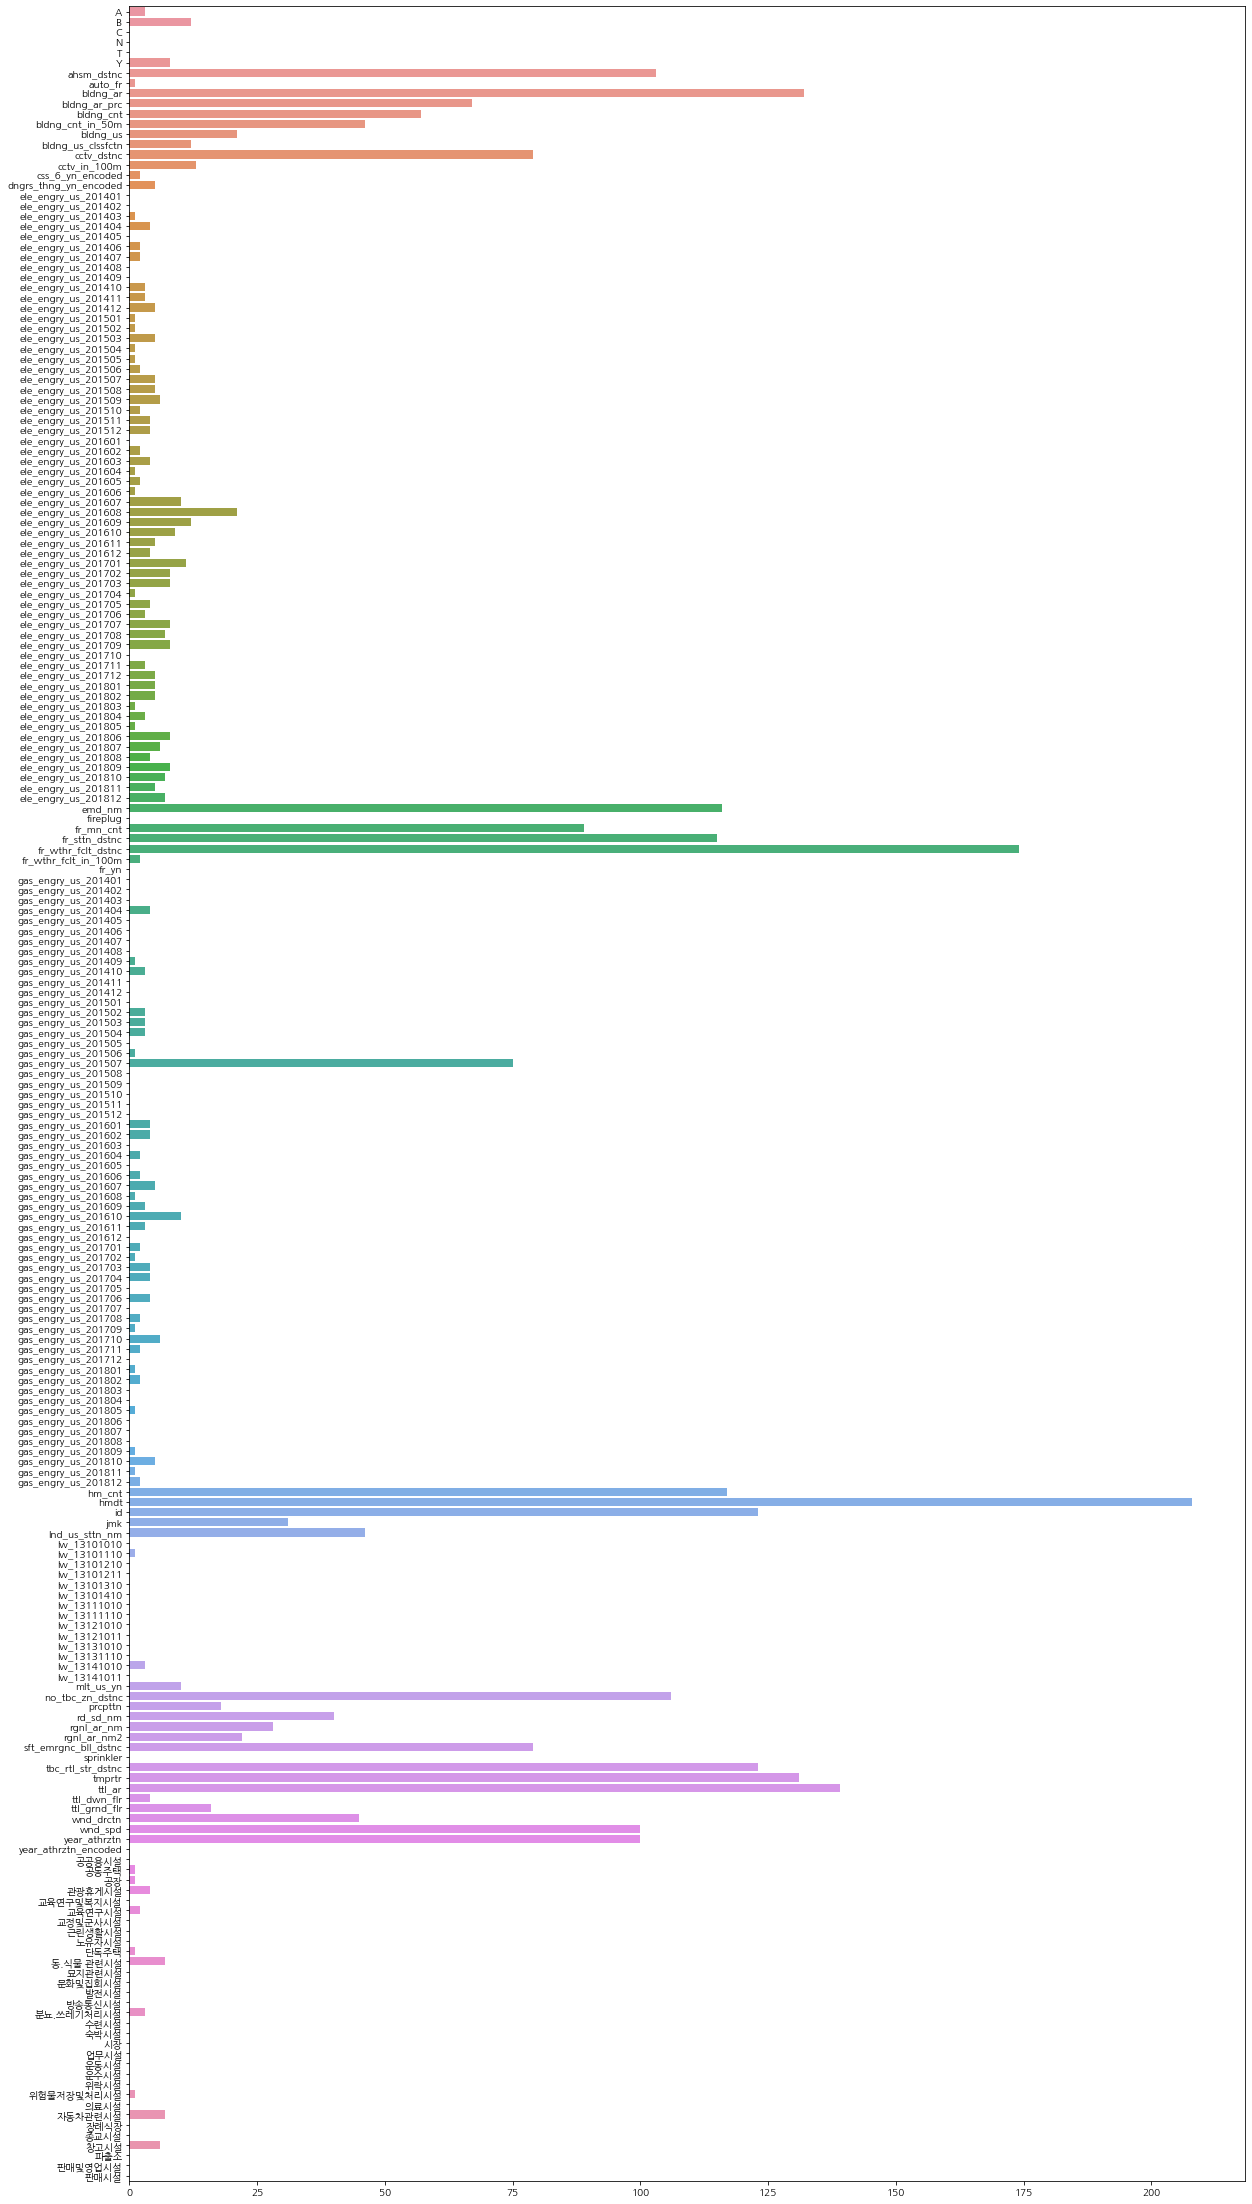

In [196]:
plt.figure(figsize=(20,40))
sns.barplot(x=lgbm_.feature_importances_, y = X_train.columns)

# ensemble

In [188]:
yhat_ensemble = 0.33*yhat_rf + 0.33*yhat_dnn + 0.33 * yhat_lgbm

In [193]:
ens_step = np.where(yhat_ensemble>0.15, 1, 0)

In [190]:
f1_score(y_val, ens_step)

0.5142035239122619